## Module 1: Introduction to regression and least squares

In [9]:
library(UsingR)
library(reshape)
data(galton)

Using  as id variables



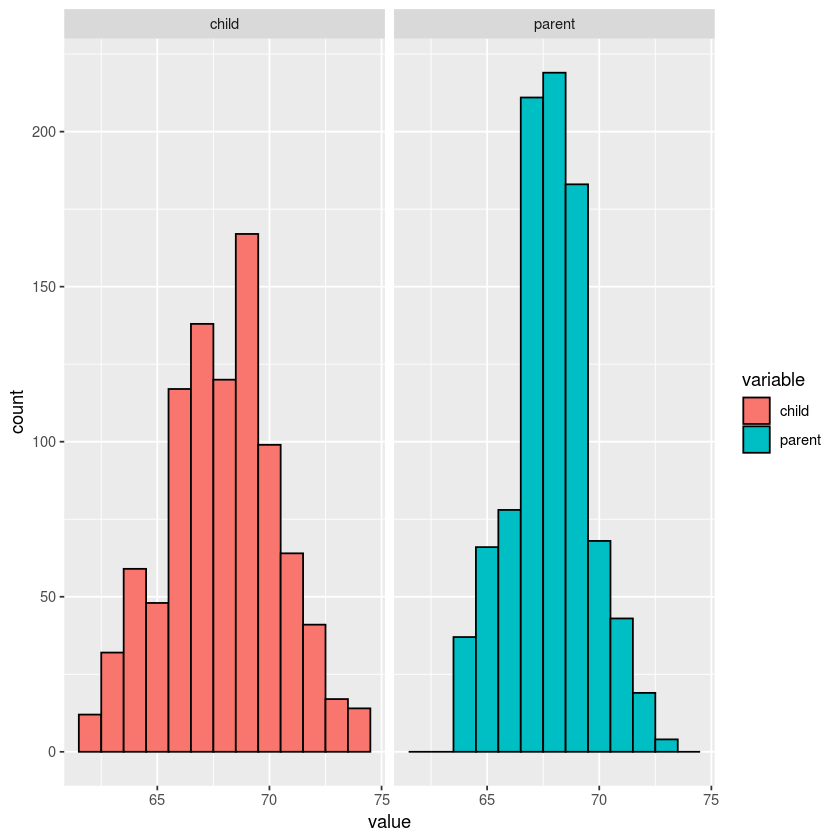

In [12]:
long <- melt(galton)
g <- NULL
g <- ggplot(data = long, aes(x = value, fill = variable))
g <- g + geom_histogram(color = 'black', binwidth = 1)
g <- g + facet_wrap(. ~ variable)
g

In [13]:
library(manipulate)
myHist <- function(mu){
    mse <- mean((galton$child - mu)^2)
    g <- NULL
    g <- ggplot(data = galton
               , aes(x = child)
               )
    g <- g + geom_histogram(fill = 'salmon'
                            , color = 'black'
                            , binwidth = 1
    )
    g <- g + geom_vline(xintercept = mu, size = 3)
    g <- g + ggtitle(past("mu = ", mu, ", MSE = ", round(mse, 2), sep = ""))
    g
}

In [14]:
# this should be run from within Rstudio
# save the code for following use
manipulate(myHist(mu), mu = slider(62, 74, step = 0.5))

ERROR: Error in manipulate(myHist(mu), mu = slider(62, 74, step = 0.5)): The manipulate package must be run from within RStudio


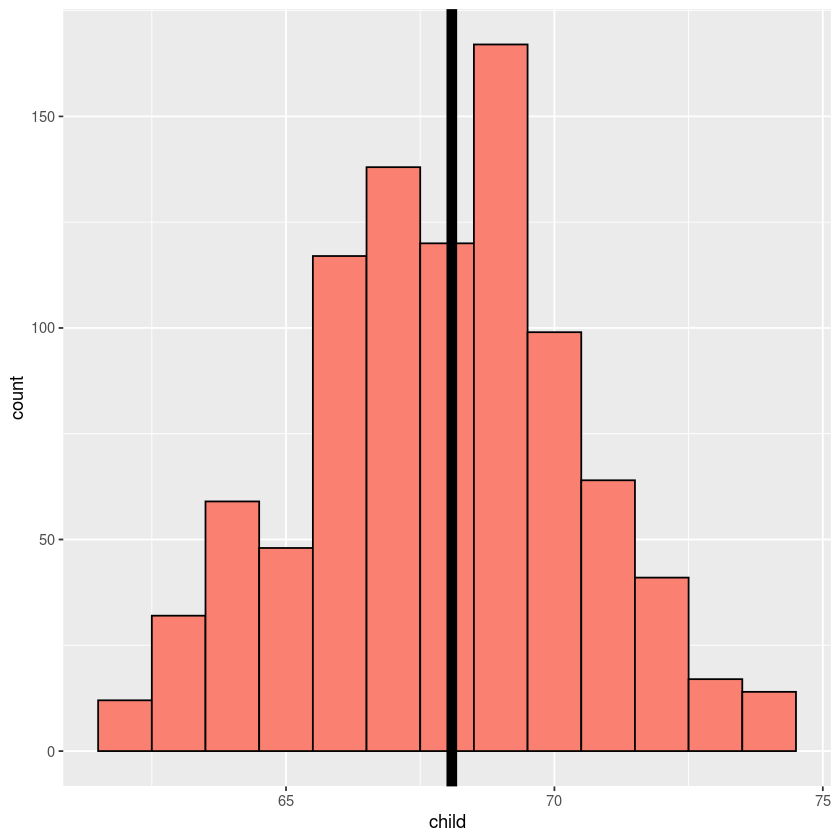

In [16]:
g <- NULL
g <- ggplot(data = galton
           , aes(x = child)
           )
g <- g + geom_histogram(fill = 'salmon'
                        , color = 'black'
                        , binwidth = 1
)
g <- g + geom_vline(xintercept = mean(galton$child), size = 3)
#g <- g + ggtitle(past("mu = ", mu, ", MSE = ", round(mse, 2), sep = ""))
g

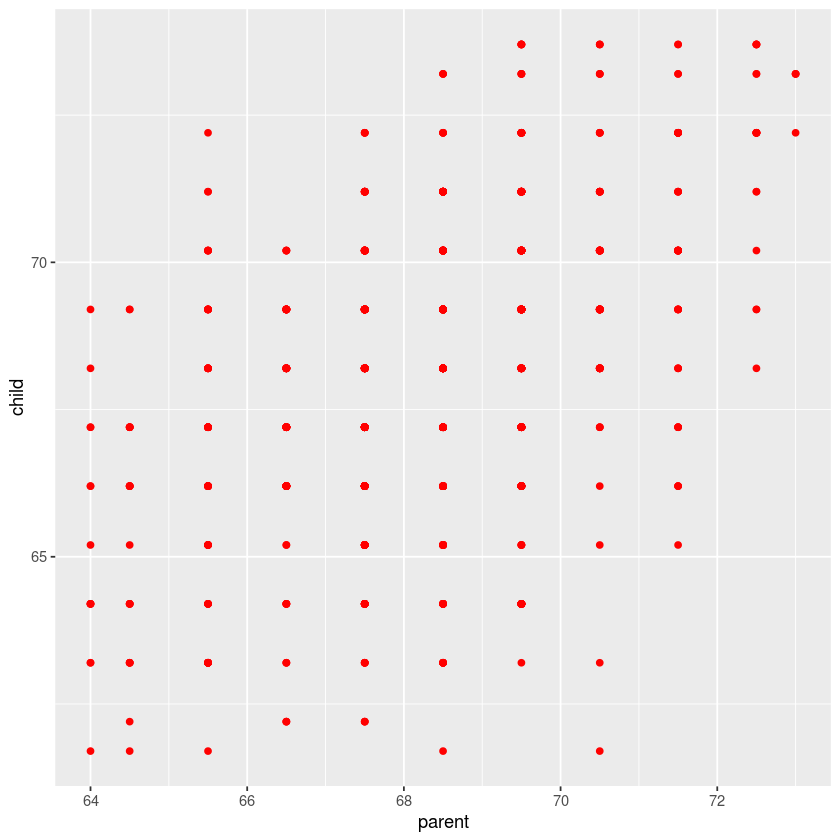

In [17]:
ggplot(data = galton, aes(x = parent, y = child)) + geom_point(color = "red")

## Module 2: Linear least squares
### The emprirical covariance
- Consider now when we have paires of data $(X_i, Y_i)$
- Their empirical covariance  
$\text{Cov}(X,Y) = \frac{1}{n-1} \sum_{i=1}^{n} \left( X_{i} - \bar{X} \right) \left( Y_{i} - \bar{Y} \right) = \frac{1}{n-1} \left( \sum_{i=1}^{n} X_{i} Y_{i} - n \bar{X} \bar{Y} \right)$
- Their correlation is defined as  
$\text{Cor}(X,Y) = \frac{\text{Cov}(X,Y)}{S_{x} S_{y}}$  
where $S_{x}$ and $S_{y}$ are the estimates of standard deviations for the $X$ observations, and $Y$ observations

Some facts about correlation
- $\text{Cor}(X,Y)$ = $\text{Cor}(Y, X)$
- $-1 \le \text{Cor}(X,Y) \le 1$
- $\text{Cor}(X,Y) = \pm 1$ only when $X$ or $Y$ observations fall perfectly on a postive or negative sloped line, respectively
- $\text{Cor}(X,Y)$ measures the strength of the linear relationship between the $X$ and $Y$ data, with stronger relationships as $\text{Cor}(X,Y)$ heads towards -1 or 1
- $\text{Cor}(X,Y) = 0$ implies no linear relationship

### Linear Least Squares
$\sum_{i=1}^{n}\left[ Y_{i} - \left( \beta_{0} + \beta_{1} X_{i} \right) \right]^{2}$

- $\hat{\beta}_{1} = \text{Cor}(Y,X) \frac{\text{Sd}(Y)}{\text{Sd}(X)}$, and $\hat{\beta}_{0} = \hat{Y} - \hat{\beta}_{1} \bar{X}$

## Module 3: Regression to the mean

In [19]:
galton$parent

,child,parent
,<dbl>,<dbl>
1,61.7,70.5
2,61.7,68.5
3,61.7,65.5
4,61.7,64.5
5,61.7,64.0
6,62.2,67.5
7,62.2,67.5
8,62.2,67.5
9,62.2,66.5


In [36]:
x <- c(0.18, -1.54, 0.42, 0.95)
w <- c(2, 1, 3, 1)
sum(x*w)/sum(w)
# mu <- c(0.3, 1.077, 0.1471, 0.0025)
#miniOLS <- function(mu){sum(w * (x-mu)^2)}
#miniOLS(0.3) # 3.88
#miniOLS(1.077) # 9.77
#miniOLS(3) # 60.68
#miniOLS(0.0025) # 3.86

[1] 0.1471429

In [38]:
x <- c(0.8, 0.47, 0.51, 0.73, 0.36, 0.58, 0.57, 0.85, 0.44, 0.42)
y <- c(1.39, 0.72, 1.55, 0.48, 1.19, -1.59, 1.23, -0.65, 1.49, 0.05)
fitXY <- lm(y ~ x - 1)
summary(fitXY)


Call:
lm(formula = y ~ x - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0692 -0.2536  0.5303  0.8592  1.1286 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)
x   0.8263     0.5817   1.421    0.189

Residual standard error: 1.094 on 9 degrees of freedom
Multiple R-squared:  0.1831,	Adjusted R-squared:  0.09238 
F-statistic: 2.018 on 1 and 9 DF,  p-value: 0.1892


In [30]:
data(mtcars) 
#head(mtcars)
fitMtcars <- lm(mpg ~ wt, data = mtcars)
summary(fitMtcars)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


In [41]:
x <- c(8.58, 10.46, 9.01, 9.64, 8.86)
mu_x = mean(x)
(x - mu_x)/sd(x)

[1] -0.9718658  1.5310215 -0.3993969  0.4393366 -0.5990954

In [42]:
x <- c(0.8, 0.47, 0.51, 0.73, 0.36, 0.58, 0.57, 0.85, 0.44, 0.42)
y <- c(1.39, 0.72, 1.55, 0.48, 1.19, -1.59, 1.23, -0.65, 1.49, 0.05)
summary(lm(y ~ x))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1640 -0.5818  0.2010  0.6669  1.1928 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    1.567      1.252   1.252    0.246
x             -1.713      2.105  -0.814    0.439

Residual standard error: 1.061 on 8 degrees of freedom
Multiple R-squared:  0.07642,	Adjusted R-squared:  -0.03903 
F-statistic: 0.662 on 1 and 8 DF,  p-value: 0.4394


In [35]:
x <- c(0.8, 0.47, 0.51, 0.73, 0.36, 0.58, 0.57, 0.85, 0.44, 0.42)
value <- c(0.573, 0.36, 0.8, 0.44)
#calc <- function(val){}
mean_x <- mean(x)
mean_x

[1] 0.573